<a href="https://colab.research.google.com/github/JonPaulBIlbao/ML-Finance-DBS/blob/Machine-Learning-in-Finance-DBS/PCA_Comparison_Manual_vs_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA in Python: Manual vs. sklearn.PCA
This notebook compares manual PCA via eigen-decomposition with PCA using `sklearn.decomposition.PCA`. All outputs are rounded to 4 decimal places for consistency.

## Imports and settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.linalg import eig

np.set_printoptions(precision=4, suppress=True)

## Load and inspect data

In [2]:
url = "https://raw.githubusercontent.com/JonPaulBIlbao/ML-Finance-DBS/Machine-Learning-in-Finance-DBS/pca_efa/PCA_2_var.csv"
data = pd.read_csv(url, sep=';', decimal=',')[['v1', 'v2']]
print(data.info())
print(data.head())
print("Missing values:\n", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      50 non-null     float64
 1   v2      50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes
None
     v1     v2
0  14.2  278.3
1  10.8  284.0
2   9.5  312.3
3   8.8  203.4
4  11.5  358.0
Missing values:
 v1    0
v2    0
dtype: int64


## Standardize data manually

In [3]:
z_manual = (data - data.mean()) / data.std(ddof=1)
print("First 5 rows of standardized data:\n", z_manual.round(4).head())
print("Variance check (manual, ddof=1):\n", z_manual.var(ddof=1).round(4))

First 5 rows of standardized data:
        v1      v2
0  1.7472  0.6683
1  0.8679  0.7252
2  0.5317  1.0075
3  0.3507 -0.0788
4  1.0489  1.4633
Variance check (manual, ddof=1):
 v1    1.0
v2    1.0
dtype: float64


## Manual PCA via eigen-decomposition

In [4]:
R = np.corrcoef(z_manual.T)
eigenvalues, eigenvectors = eig(R)
Lambda = np.diag(eigenvalues)

pca_scores_manual = np.asarray(z_manual @ eigenvectors)
pca_df_manual = pd.DataFrame(pca_scores_manual, columns=['PC1', 'PC2'])

print("Eigenvalues (manual):", np.round(eigenvalues, 4))
print("PCA scores (manual) summary:\n", pca_df_manual.describe().round(4))

Eigenvalues (manual): [1.6486 0.3514]
PCA scores (manual) summary:
            PC1      PC2
count  50.0000  50.0000
mean   -0.0000  -0.0000
std     1.2840   0.5928
min    -2.3781  -1.4103
25%    -1.0433  -0.3756
50%    -0.1414   0.0023
75%     1.0949   0.3198
max     2.7474   1.1733


## Variance and correlation of manual PCA scores

In [5]:
var_pc1 = np.var(pca_df_manual['PC1'], ddof=0)
var_pc2 = np.var(pca_df_manual['PC2'], ddof=0)
corr_pc1_pc2 = np.corrcoef(pca_df_manual['PC1'], pca_df_manual['PC2'])[0, 1]

print(f"Variance PC1 (manual): {var_pc1:.4f}")
print(f"Variance PC2 (manual): {var_pc2:.4f}")
print(f"Correlation PC1-PC2 (manual): {corr_pc1_pc2:.4f}")

Variance PC1 (manual): 1.6156
Variance PC2 (manual): 0.3444
Correlation PC1-PC2 (manual): 0.0000


## PCA using sklearn

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pca_model = PCA(n_components=2)
pca_scores_sklearn = pca_model.fit_transform(scaled_data)
pca_df_sklearn = pd.DataFrame(pca_scores_sklearn, columns=['PC1', 'PC2'])

print("Explained variance (sklearn):", np.round(pca_model.explained_variance_, 4))
print("Explained variance ratio (sklearn):", np.round(pca_model.explained_variance_ratio_, 4))
print("PCA scores (sklearn) summary:\n", pca_df_sklearn.describe().round(4))

Explained variance (sklearn): [1.6822 0.3586]
Explained variance ratio (sklearn): [0.8243 0.1757]
PCA scores (sklearn) summary:
            PC1      PC2
count  50.0000  50.0000
mean   -0.0000  -0.0000
std     1.2970   0.5989
min    -2.4022  -1.4246
25%    -1.0539  -0.3795
50%    -0.1429   0.0023
75%     1.1060   0.3230
max     2.7753   1.1852


## Compare scatter plots

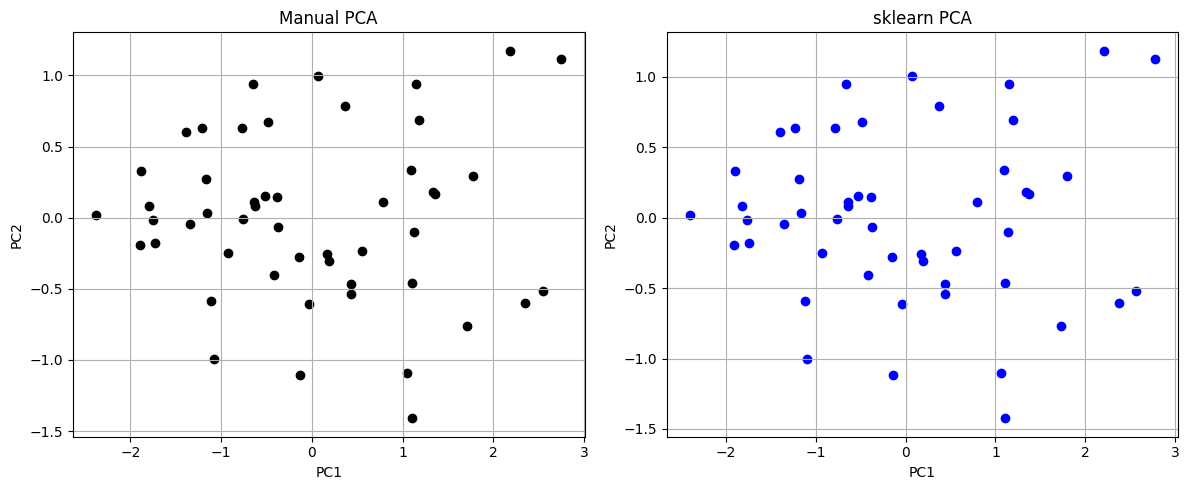

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(pca_df_manual['PC1'], pca_df_manual['PC2'], color='black')
axs[0].set_title("Manual PCA")
axs[0].set_xlabel("PC1")
axs[0].set_ylabel("PC2")
axs[0].grid(True)

axs[1].scatter(pca_df_sklearn['PC1'], pca_df_sklearn['PC2'], color='blue')
axs[1].set_title("sklearn PCA")
axs[1].set_xlabel("PC1")
axs[1].set_ylabel("PC2")
axs[1].grid(True)

plt.tight_layout()
plt.show()